In [1]:
import os
os.chdir('../')
os.getcwd()

'/work'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

In [4]:
from process.preprocess.get_set_options import get_configs
from process.preprocess.get_dataset import _make_dataset_uci

In [5]:
CONFIG_DIR_UCI = './configs/experiments_uci.yml'

In [78]:
def plot_y_countplot(df, split_col, target_col):
    ax = sns.countplot(x=split_col, hue=target_col, data=df)
#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))
    
    return ax

def plot_y_boxplot(df, split_col, target_col):
    ax = sns.boxplot(x=split_col, y=target_col, data=df)
    
    return ax


def plot_tsne(df, split_col, target_col, perplexity, njobs=None):

    features_ori = df.drop(columns=[split_col,target_col])
    is_cat_cols = features_ori.dtypes == object
    cat_cols = features_ori.columns[is_cat_cols]
    num_cols = features_ori.columns[~is_cat_cols]

    if len(cat_cols)>0:
        onehot = OneHotEncoder(sparse=False)
        features_cat = onehot.fit_transform(features_ori[cat_cols])
    else:
        features_cat = np.empty(0)

    if len(num_cols)>0:
        scaler = StandardScaler()
        features_num = scaler.fit_transform(features_ori[num_cols].values)
    else:
        features_num = np.empty(0)

    print(features_cat.shape, features_num.shape)
    if len(cat_cols)>0 & len(num_cols)>0:
        features = np.concatenate([features_num, features_cat], axis=1)
    elif len(cat_cols)>0:
        features = features_cat
    elif len(num_cols)>0:
        features = features_num
    tsne = TSNE(perplexity=perplexity, random_state=0, n_jobs=njobs)
    features_embedd = tsne.fit_transform(features)

    df_embedd = pd.DataFrame(features_embedd, columns=["embedd_x","embedd_y"])
    df_embedd[split_col] = df[split_col]
    df_embedd[target_col] = df[target_col]

    ax = sns.relplot(x="embedd_x", y="embedd_y", hue=target_col, col=split_col, data=df_embedd)
    
    return ax


def get_plots(config_all, dataset_name, tsne_perplexity, tsne_njobs=None):
    config = config_all["datasets"][dataset_name]
    df = _make_dataset_uci(config)
    y_feature = config["y_feature"]
    split_feature = config["split_feature"]
    if config['task']=="classification":
        ax_y = plot_y_countplot(df, split_feature, y_feature)
    else:
        ax_y = plot_y_boxplot(df, split_feature, y_feature)
    ax_tsne = plot_tsne(df, split_feature, y_feature, tsne_perplexity, tsne_njobs)
    
    return ax_y, ax_tsne

In [68]:
config_all = get_configs(None, CONFIG_DIR_UCI)

# 各データセットごとに分析

## mushroom

(8124, 115) (0,)
CPU times: user 3min 21s, sys: 525 ms, total: 3min 22s
Wall time: 28.9 s


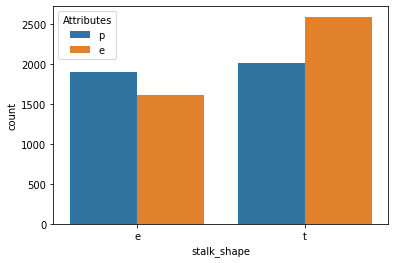

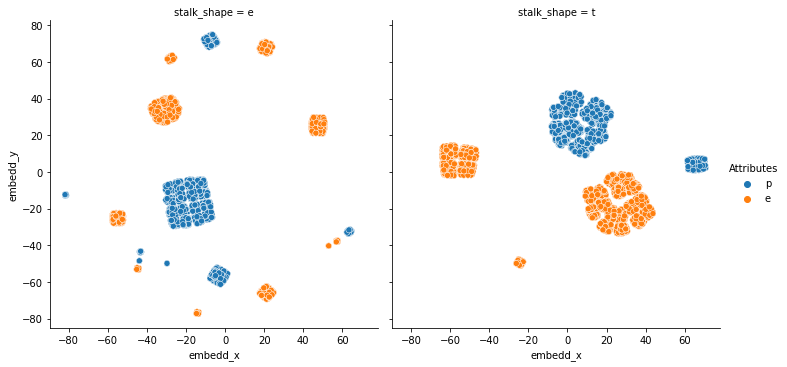

In [69]:
%%time
box, tsne = get_plots(config_all, "mushroom", 30)

(8124, 115) (0,)
CPU times: user 5min 21s, sys: 600 ms, total: 5min 21s
Wall time: 23.8 s


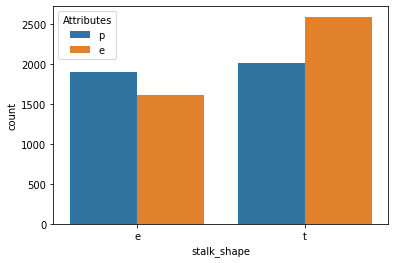

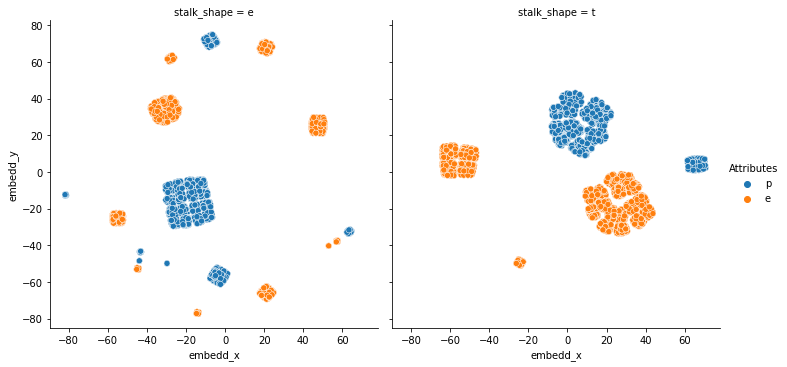

In [70]:
%%time
box, tsne = get_plots(config_all, "mushroom", 30, -1)

## banknote

(0,) (1372, 3)


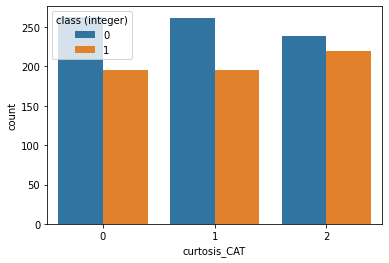

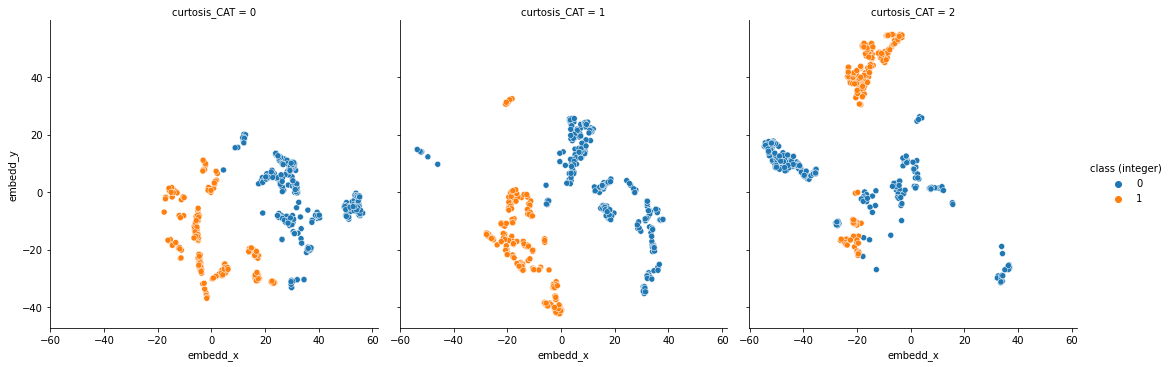

In [71]:
box, tsne = get_plots(config_all, "banknote", 30)

# default

(0,) (30000, 23)
CPU times: user 17min 47s, sys: 5.13 s, total: 17min 53s
Wall time: 1min 49s


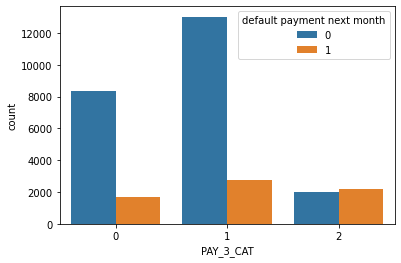

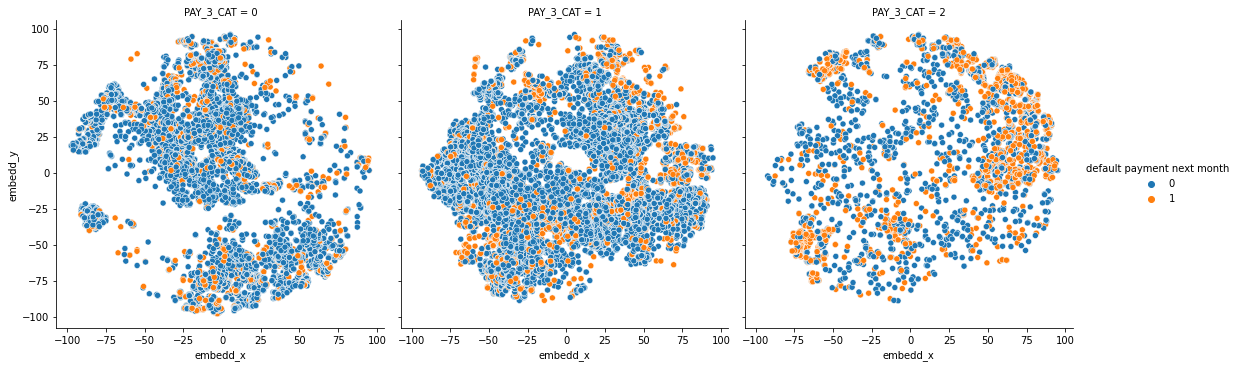

In [72]:
%%time
box, tsne = get_plots(config_all, "default", 5)

## concrete

(0,) (1029, 7)


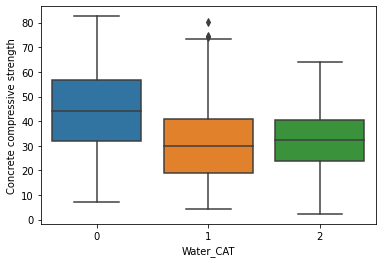

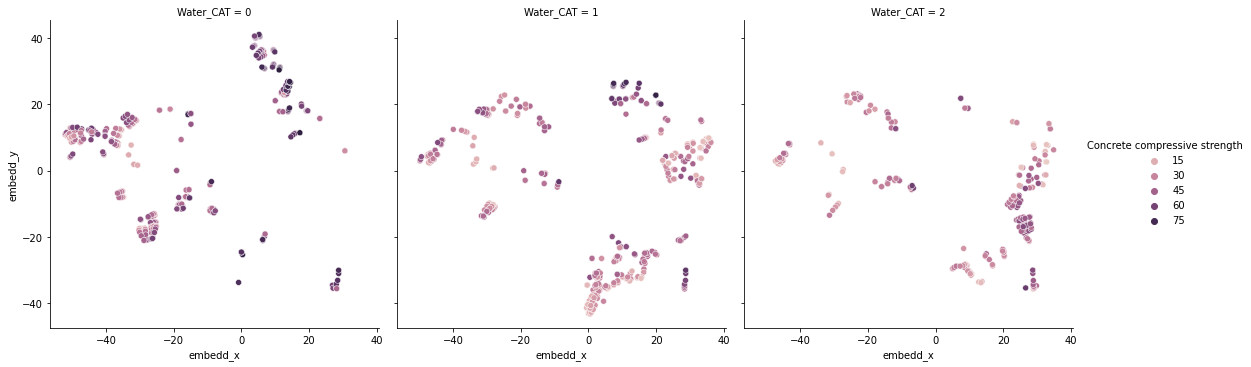

In [63]:
fig_y, fig_tsne = get_plots(config_all, "concrete", 30)

## qsar

(0,) (908, 5)
CPU times: user 55.6 s, sys: 192 ms, total: 55.8 s
Wall time: 3.12 s


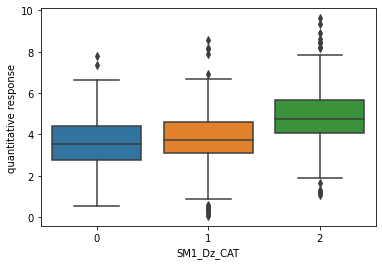

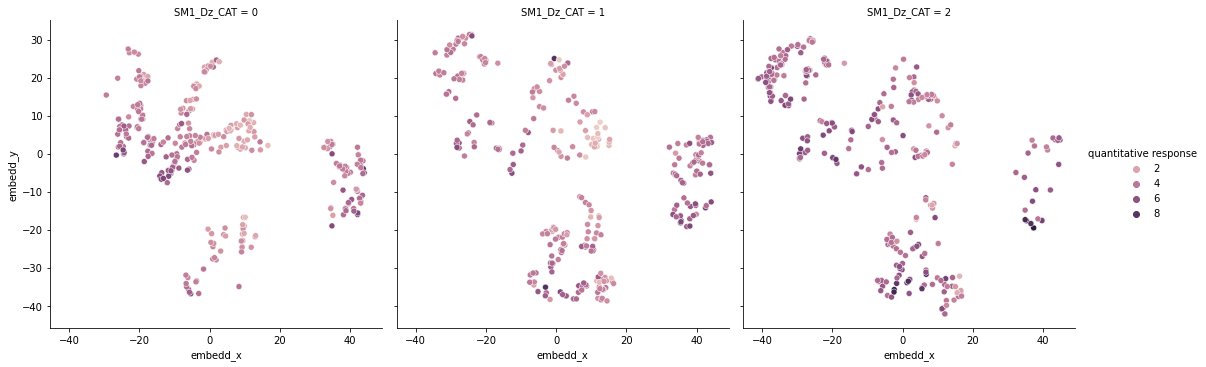

In [73]:
%%time
box, tsne = get_plots(config_all, "qsar", 30)

## bike

(0,) (731, 10)
CPU times: user 45.5 s, sys: 186 ms, total: 45.7 s
Wall time: 2.4 s


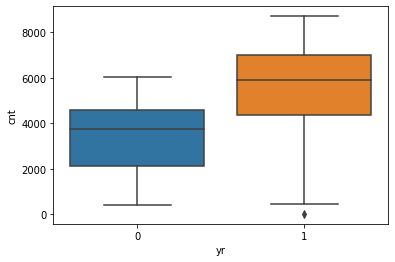

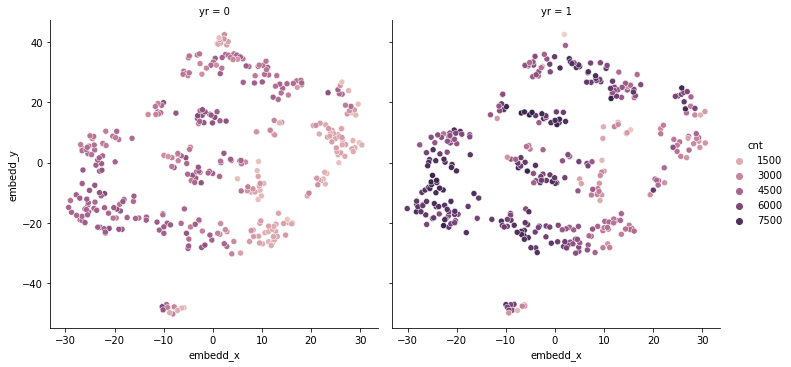

In [74]:
%%time
box, tsne = get_plots(config_all, "bike", 30)

## traffic

(48204, 11) (48204, 8)
CPU times: user 18min 28s, sys: 30.3 s, total: 18min 58s
Wall time: 2min 43s


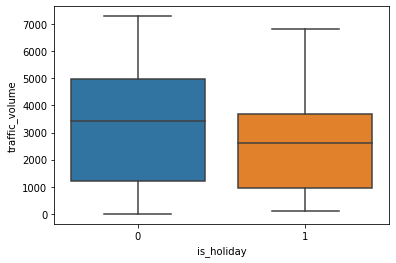

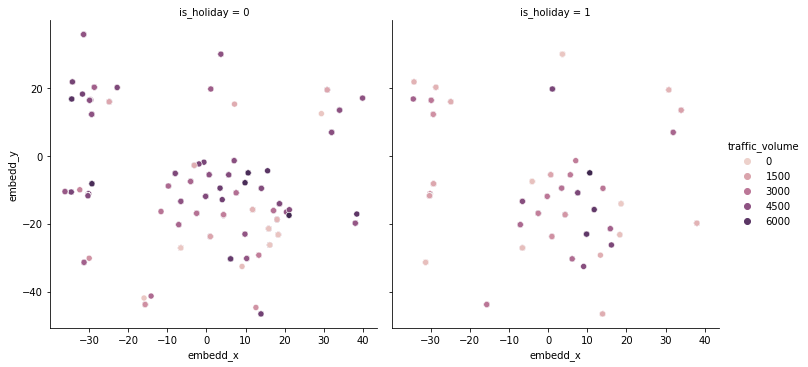

In [75]:
%%time
box, tsne = get_plots(config_all, "traffic", 30)